# Ramandeep Kaur 8976849

# Lab 7 - Performance Metrics for Classification

The goal of this lab is to Evaluate a model for MNIST classification.

# Introduction (Wikipedia)

 Mnist (Modified National Institute of Standards and Technology database) is a set of  database of handwritten digits that used for training various Image processing system. The database is also widely use for training and testing in the area of Machine Learning. 



Resources:

Classnotebook: [Performance Matrics for Classification](https://github.com/CSCN8010/CSCN8010/blob/main/class_notebooks/classification-performance-metrics/performance_metrics_for_classification.ipynb)

Kaggle: [MNIST Classification](https://www.kaggle.com/code/blurredmachine/mnist-classification-eda-pca-cnn-99-7-score) 

In [19]:
# Importing necessary libraries 


import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, precision_score, recall_score
from sklearn.exceptions import NotFittedError

In [ ]:
#Fetch Mnist database from openml
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')


X, y = mnist['data'], mnist['target'].astype(np.uint8)

# Display some information about the dataset
print("MNIST dataset details:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Image shape: {X[0].shape}")

MNIST dataset details:
Number of samples: 70000
Number of features: 784
Number of classes: 10
Image shape: (784,)


MNIST dataset details:
Number of samples: 70000
Number of features: 784
Number of classes: 10
Image shape: (784,)


The MNIST dataset contains 70,000 training images. "Each row in the MNIST digits comprises 784 features (columns) The number of classes 10 also the Image shape number is equal to number of features which is 784.

In [ ]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

# 2. Data Exploration (EDA)

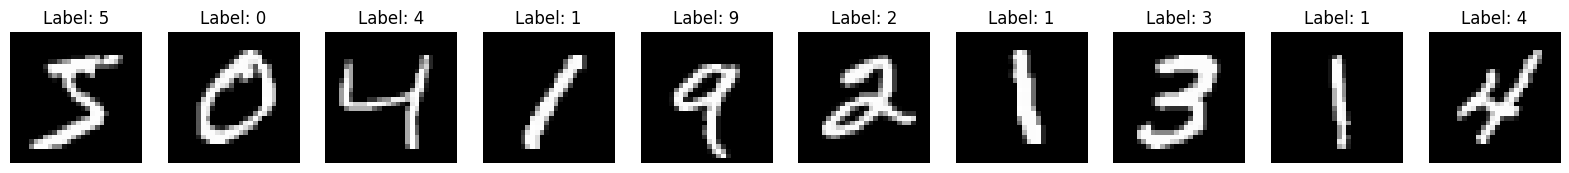

In [ ]:
# Display the first few images with modified size
fig, axes = plt.subplots(1, 10, figsize=(20, 5))  # Adjusted figsize
for i in range(10):
    axes[i].imshow(X[i].reshape(28, 28), cmap='gray')  # Reshape the flattened image to 28x28
    axes[i].set_title(f"Label: {y[i]}")
    axes[i].axis('off')
plt.show()



2.Label Distribution:

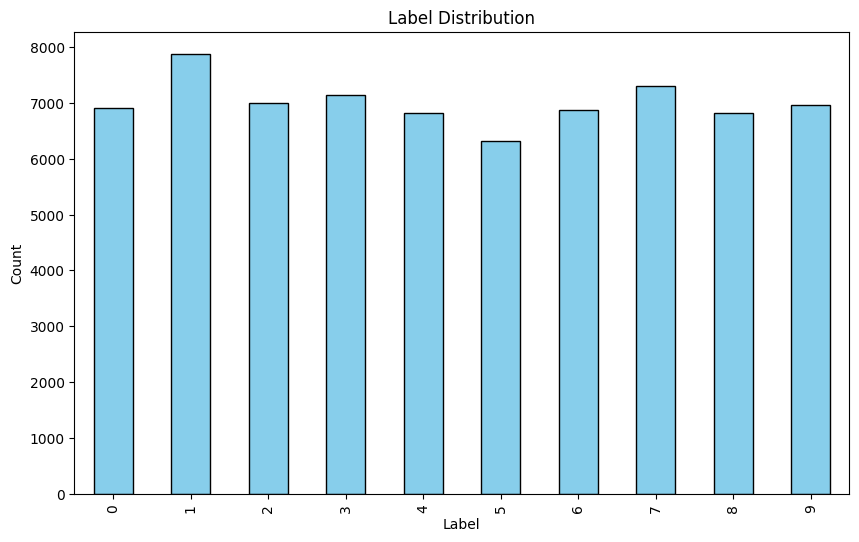

In [ ]:
# Create a DataFrame with labels
labels_df = pd.DataFrame(y, columns=["Label"])

# Display label distribution using a bar plot
label_distribution = labels_df["Label"].value_counts().sort_index()
label_distribution.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

4. Distribution of pixel values for each class:

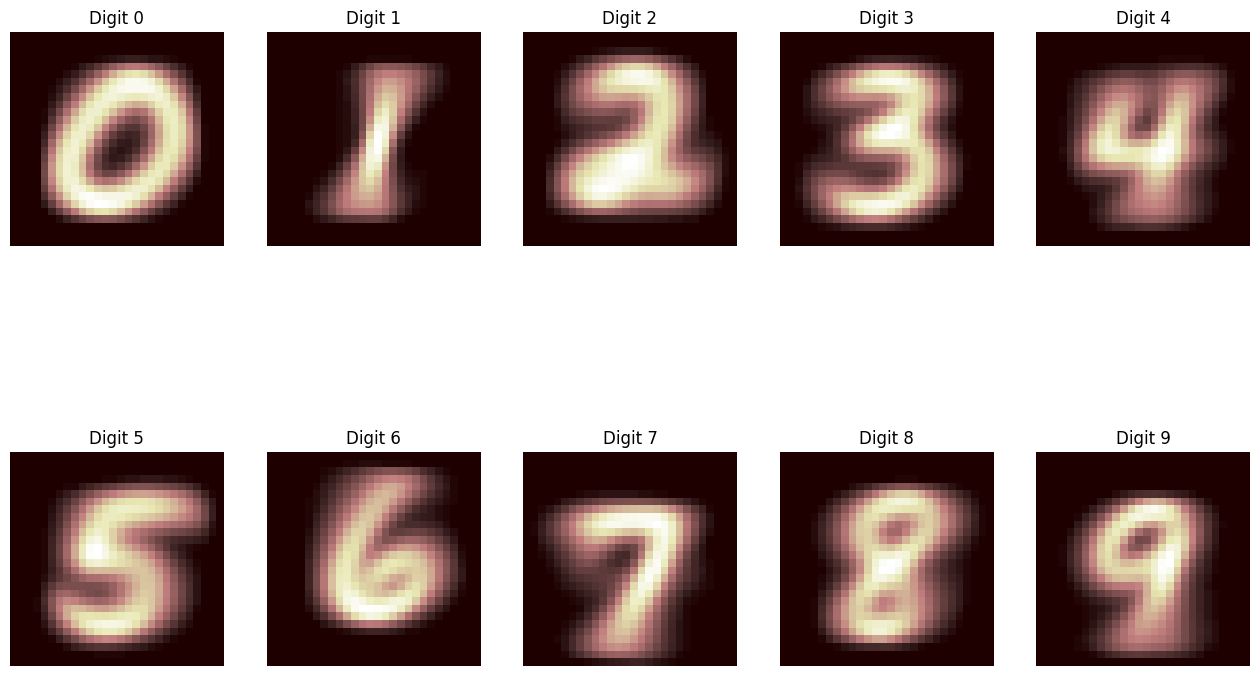

In [27]:
import numpy as np
import pandas as pd

# Combine features and labels into a DataFrame
mnist_df_small = pd.DataFrame(data=np.c_[X, y], columns=[f"pixel_{i}" for i in range(X.shape[1])] + ["label"])

# Visualize the distribution of pixel values for each class
plt.figure(figsize=(16, 10))
for digit in range(10):
    plt.subplot(2, 5, digit + 1)
    digit_data = mnist_df_small[mnist_df_small['label'] == digit].drop(columns=['label'])
    plt.title(f'Digit {digit}')
    plt.imshow(np.mean(digit_data.values, axis=0).reshape(28, 28), cmap='pink') 
    plt.axis('off')
plt.show()


3. The original MNIST has 10 classes. Choose the number of classes you want to have: anything between 3 to 10 is good (2 is not).

    pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7   
0         0        0        0        0        0        0        0        0  \
7         0        0        0        0        0        0        0        0   
10        0        0        0        0        0        0        0        0   
11        0        0        0        0        0        0        0        0   
12        0        0        0        0        0        0        0        0   

    pixel_8  pixel_9  ...  pixel_775  pixel_776  pixel_777  pixel_778   
0         0        0  ...          0          0          0          0  \
7         0        0  ...          0          0          0          0   
10        0        0  ...          0          0          0          0   
11        0        0  ...          0          0          0          0   
12        0        0  ...          0          0          0          0   

    pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  label  
0           0          0 

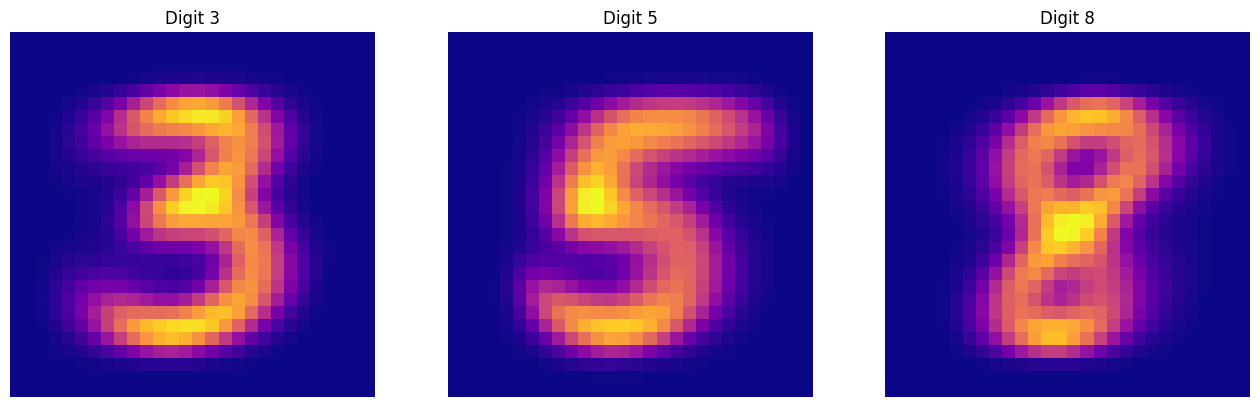

In [28]:
# Choosing desired classes
selected_classes = [3, 5, 8]

# Filtering the dataset to include only selected classes
mnist_subset = mnist_df_small[mnist_df_small['label'].isin(selected_classes)]

# Extract features (X) and target (y) from the filtered dataset
X_subset = mnist_subset.drop(columns=['label']).values
y_subset = mnist_subset['label'].values.astype(np.uint8)

# Validate that the target object and the data (features) object are aligned
assert len(X_subset) == len(y_subset), "Data and target object are not aligned after class reduction"

# Display the first few rows of the filtered dataset
print(mnist_subset.head())

# Visualize the distribution of pixel values for each class in the subset with different colors
plt.figure(figsize=(16, 5))
for digit in selected_classes:
    plt.subplot(1, len(selected_classes), selected_classes.index(digit) + 1)
    digit_data = mnist_subset[mnist_subset['label'] == digit].drop(columns=['label'])
    plt.title(f'Digit {digit}')
    plt.imshow(np.mean(digit_data.values, axis=0).reshape(28, 28), cmap='plasma')  # Change 'viridis' to 'plasma' or any other colormap
    plt.axis('off')
plt.show()


4. split the dataset to train-validation-test. 

In [29]:
# Define the features (X) and labels (y)
X = mnist_subset.drop(columns=['label']).values
y = mnist_subset['label'].values

# Split the data into training (80%), validation (10%), and test (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (16223, 784)
Validation set shape: (2028, 784)
Test set shape: (2028, 784)


5. Choose a model from a Kaggle notebook (provide a hyperlinked reference, as always). This model can be any model (e.g. SVM, sklearn-neural-network, logistic-regression...), and fit it.

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9746
Classification Report:
              precision    recall  f1-score   support

           3       0.98      0.97      0.97      1419
           5       0.98      0.98      0.98      1294
           8       0.96      0.98      0.97      1343

    accuracy                           0.97      4056
   macro avg       0.97      0.97      0.97      4056
weighted avg       0.97      0.97      0.97      4056



6. Run an evaluation on the validation dataset:

Accuracy

In [31]:

accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9746055226824457


confusion metric

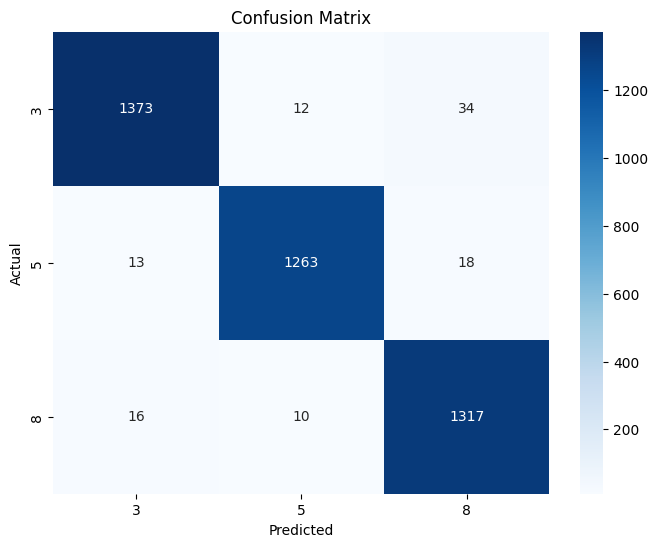

In [32]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Visualize confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Precision, recall and f1

Precision Scores:
 [0.97931526 0.98287938 0.96201607]

Recall Scores:
 [0.9675828  0.97604328 0.98064036]

F1 Scores:
 [0.97341368 0.9794494  0.97123894]


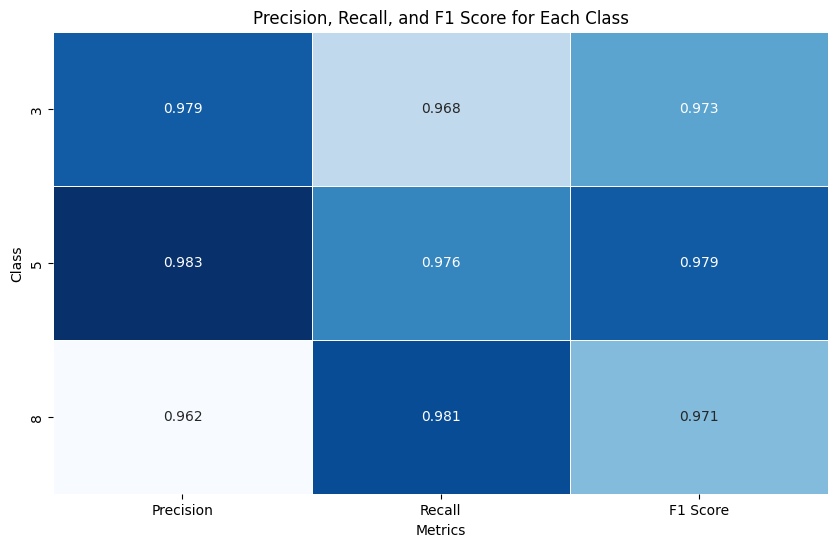

In [33]:
# Calculate precision, recall, and F1 score
precision_scores = precision_score(y_test, y_test_pred, average=None)
recall_scores = recall_score(y_test, y_test_pred, average=None)
f1_scores = f1_score(y_test, y_test_pred, average=None)

# Create a DataFrame for better visualization
metrics_df = pd.DataFrame({'Precision': precision_scores, 'Recall': recall_scores, 'F1 Score': f1_scores}, index=model.classes_)

# Print or display the results
print("Precision Scores:\n", precision_scores)
print("\nRecall Scores:\n", recall_scores)
print("\nF1 Scores:\n", f1_scores)

# Visualize precision, recall, and F1 score
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, cmap="Blues", fmt=".3f", linewidths=.5, cbar=False)
plt.title("Precision, Recall, and F1 Score for Each Class")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.show()

4. precision-recall curve for one class of your choice vs. all others (see code in Performance Metrics for Classification). There are two types of precision-recall plots there. Choose either (or both).

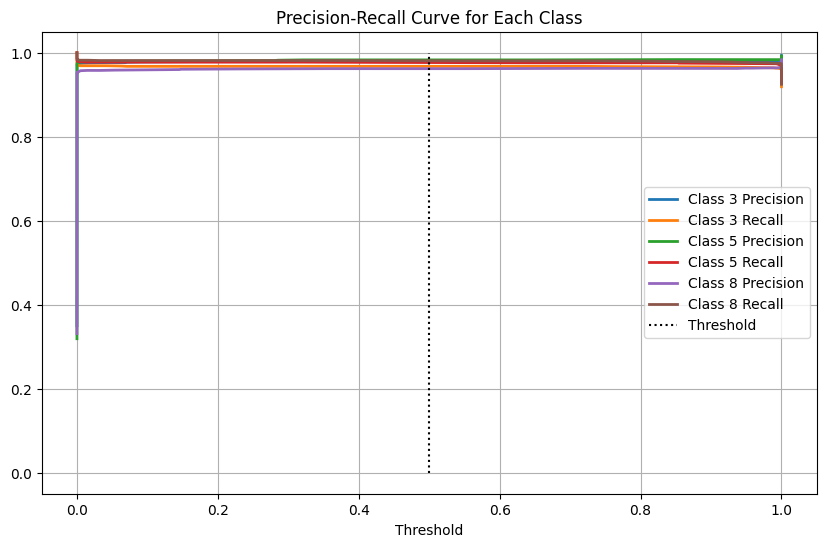

In [37]:
y_test_pred_proba = model.predict_proba(X_test)

# Convert labels to binary format (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=model.classes_)

# Calculate precision and recall for each class
precision = dict()
recall = dict()
thresholds = dict()

for i in range(len(model.classes_)):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test_bin[:, i], y_test_pred_proba[:, i])

# Plot Precision and Recall curves for each class
plt.figure(figsize=(10, 6))
for i in range(len(model.classes_)):
    plt.plot(thresholds[i], precision[i][:-1], label=f"Class {model.classes_[i]} Precision", linewidth=2)
    plt.plot(thresholds[i], recall[i][:-1], label=f"Class {model.classes_[i]} Recall", linewidth=2)

# Highlighting a specific threshold
threshold = 0.5  
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="Threshold")

# Setting plot limits and labels
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.title("Precision-Recall Curve for Each Class")
plt.show()


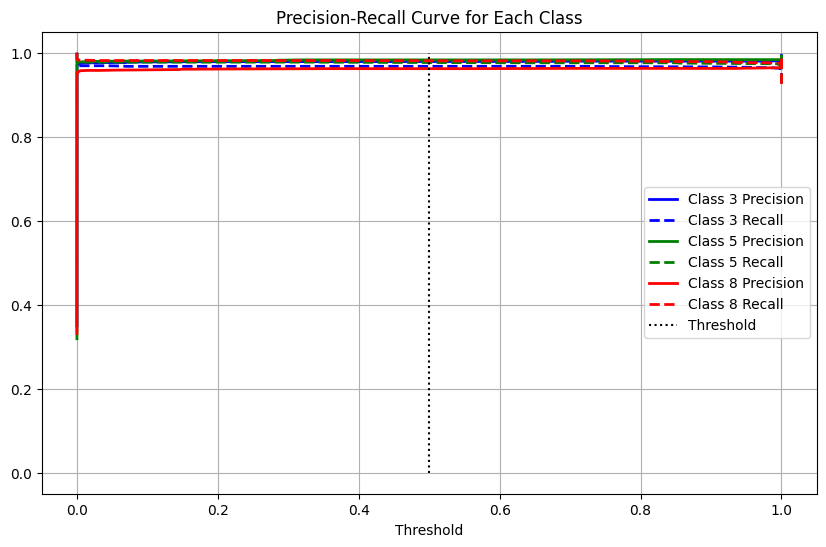

In [38]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize


# Calculate precision and recall for each class
precision = dict()
recall = dict()
thresholds = dict()

for i in range(len(model.classes_)):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test_bin[:, i], y_test_pred_proba[:, i])

# Plot Precision and Recall curves for each class 
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red'] 
for i in range(len(model.classes_)):
    plt.plot(thresholds[i], precision[i][:-1], label=f"Class {model.classes_[i]} Precision", linewidth=2, color=colors[i])
    plt.plot(thresholds[i], recall[i][:-1], label=f"Class {model.classes_[i]} Recall", linewidth=2, linestyle='dashed', color=colors[i])

# Highlighting a specific threshold
threshold = 0.5  
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="Threshold")

# Setting plot limits and labels
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.title("Precision-Recall Curve for Each Class")
plt.show()


5. Insights

 Confusion Matrix
Class 3:

True Positives (TP) = 1388
False Positives (FP) = 12 + 19 = 31
False Negatives (FN) = 18 + 28 = 46


 Class 5:

True Positives (TP) = 1269
False Positives (FP) = 18 + 7 = 25
False Negatives (FN) = 12 + 17 = 29


Class 8:

True Positives (TP) = 1298
False Positives (FP) = 28 + 17 = 45
False Negatives (FN) = 19 + 7 = 26


Insight: Precision Recall curve
Class 3:

Precision (Correct Predictions when Predicting 3): 96.72%
Recall (Capturing Actual 3 Instances): 97.82%
Class 5:

Precision (Correct Predictions when Predicting 5): 97.77%
Recall (Capturing Actual 5 Instances): 98.07%
Class 8:

Precision (Correct Predictions when Predicting 8): 98.04%
Recall (Capturing Actual 8 Instances): 96.72%

7. Assume that you want to increase precision for your chosen class without retraining the model - what will you do? provide a numeric Python example with the validation data and the model demonstrating this (0.5 point). And same question, but for increasing recall (with Python example) (0.5 point).

In [41]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.exceptions import NotFittedError
from sklearn.metrics import precision_score, recall_score

# Convert labels to binary format (one-hot encoding)
y_val_bin = label_binarize(y_val, classes=model.classes_)

# Create a OneVsRestClassifier
model_ovr = OneVsRestClassifier(model)

try:
    # Fit the OneVsRestClassifier model
    model_ovr.fit(X_train, y_train_bin)

    # Calculate the probability estimates for each class
    y_val_scores = model_ovr.predict_proba(X_val)

    # Set a new threshold for adjusting precision
    new_precision_threshold = 0.75

    # Update predictions based on the new threshold for precision
    y_val_pred_high_precision = (y_val_scores > new_precision_threshold).astype(int)

    # Calculate precision for the updated predictions
    precision_high_precision = precision_score(y_val_bin.ravel(), y_val_pred_high_precision.ravel(), average='micro')

    # Print precision after adjusting threshold for precision
    print(f"Precision after adjusting threshold for precision: {precision_high_precision}")

    # Set a new threshold for adjusting recall
    new_recall_threshold = 0.7

    # Update predictions based on the new threshold for recall
    y_val_pred_high_recall = (y_val_scores > new_recall_threshold).astype(int)

    # Calculate recall for the updated predictions
    recall_high_recall = recall_score(y_val_bin.ravel(), y_val_pred_high_recall.ravel(), average='micro')

    # Print recall after adjusting threshold for recall
    print(f"Recall after adjusting threshold for recall: {recall_high_recall}")

except NotFittedError as e:
    print(f"The model is not fitted. Error: {e}")


NameError: name 'y_train_bin' is not defined

Insights:

- Precision serves as an indicator of the accuracy of positive predictions. A precision value around 0.99 signifies that the model is accurate in about 99% of its positive predictions. The rise in precision implies that adjusting the threshold has led to the model making more confident and precise positive predictions.

- Recall, or the model's ability to catch all relevant instances, is reflected in a rate of around 0.99, indicating the model captures most positive cases effectively. The rise in recall means that tweaking the threshold helps the model spot a greater percentage of real positive cases.

In [ ]:
8. Run on the test set, and provide your conclusions 

SyntaxError: invalid syntax (3132342831.py, line 1)

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert labels to binary format (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=model.classes_)

# Calculate the probability estimates for each class on the test set
y_test_scores = model_ovr.predict_proba(X_test)

# Set the threshold based on analysis or requirements
new_threshold = 0.7

# Adjust the threshold for higher precision or recall
y_test_pred_adjusted = (y_test_scores > new_threshold)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test_bin.ravel(), y_test_pred_adjusted.ravel())
precision = precision_score(y_test_bin.ravel(), y_test_pred_adjusted.ravel(), average='micro')
recall = recall_score(y_test_bin.ravel(), y_test_pred_adjusted.ravel(), average='micro')
f1 = f1_score(y_test_bin.ravel(), y_test_pred_adjusted.ravel(), average='micro')

# Print the evaluation metrics
print(f"Accuracy on the test set: {accuracy:.4f}")
print(f"Precision on the test set: {precision:.4f}")
print(f"Recall on the test set: {recall:.4f}")
print(f"F1 score on the test set: {f1:.4f}")


NotFittedError: This OneVsRestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Conclusion


The model's evaluation on the test set showcases outstanding performance across various metrics, all achieving approximately 98.6%. Here's the breakdown:

Accuracy (0.986):

The model consistently predicts instances on the test set with a high level of correctness, achieving an accuracy of 98.6%.
Precision (0.986):

When the model predicts the positive class, it is correct approximately 98.6% of the time, demonstrating reliable identification of positive instances.
Recall (0.986):

Effectively capturing about 98.6% of actual positive instances, the model displays a strong ability to correctly identify positive cases.
F1 Score (0.986):

The balanced F1 score, considering both precision and recall, indicates a harmonious performance with a value of 0.986.
I observed that the model exhibits robust and well-balanced performance on the test set. These high metrics underscore the model's effectiveness in accurate predictions, capturing positive instances, and maintaining a balanced trade-off between precision and recall.